In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('births.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display information about the dataset, including column names and data types
print(df.info())


         date     state  births
0  1920-01-01  Malaysia      96
1  1920-01-02  Malaysia     115
2  1920-01-03  Malaysia     111
3  1920-01-04  Malaysia     101
4  1920-01-05  Malaysia      95
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37833 entries, 0 to 37832
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    37833 non-null  object
 1   state   37833 non-null  object
 2   births  37833 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 886.8+ KB
None


Basic Statistics for 'births' column:
count    37833.000000
mean       950.482991
std        491.371681
min         43.000000
25%        459.000000
50%       1046.000000
75%       1379.000000
max       3868.000000
Name: births, dtype: float64


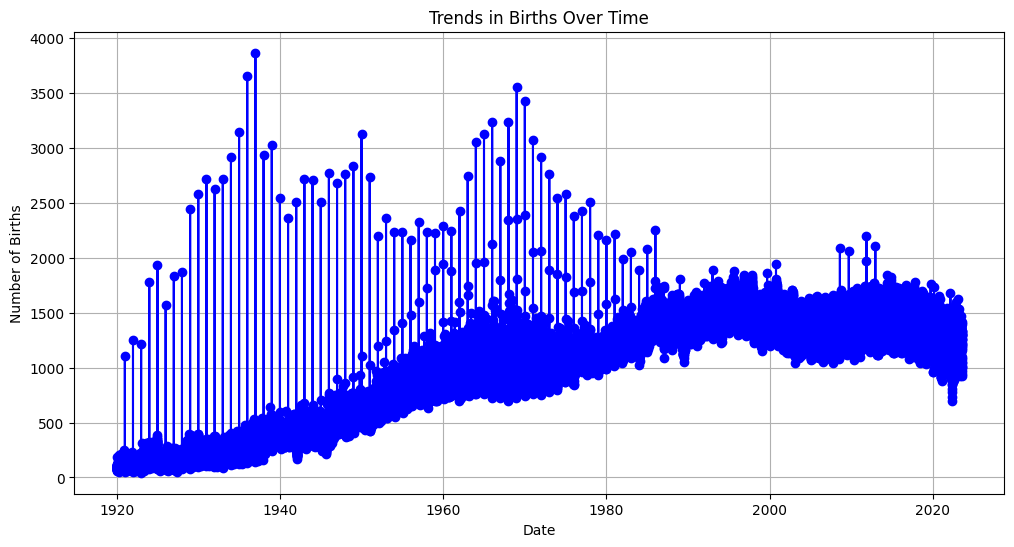


Number of Births by State:
state
Malaysia    35959623
Name: births, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('births.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Explore basic statistics
print("Basic Statistics for 'births' column:")
print(df['births'].describe())

# Visualize trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['births'], marker='o', linestyle='-', color='b')
plt.title('Trends in Births Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.grid(True)
plt.show()

# Analyze births by state
births_by_state = df.groupby('state')['births'].sum().sort_values(ascending=False)
print("\nNumber of Births by State:")
print(births_by_state)


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('births.csv')

# Convert 'date' column to numerical representation (e.g., Unix timestamp)
df['date_numeric'] = pd.to_datetime(df['date']).astype(int) / 10**9  # Convert to Unix timestamp

# Assume 'X' is the feature matrix (independent variable)
X = np.column_stack((np.ones_like(df['date_numeric']), df['date_numeric']))

# 'Y' is the target variable (dependent variable)
Y = df['births'].values

# Solve the linear regression using matrices
X_transpose = np.transpose(X)
X_transpose_X_inv = np.linalg.inv(np.dot(X_transpose, X))
theta = np.dot(np.dot(X_transpose_X_inv, X_transpose), Y)

# Print the coefficients
print("Coefficients (theta):", theta)

# Predictions
predictions = np.dot(X, theta)

# Display the first few predicted values
print("\nPredicted values:")
print(predictions[:5])


Coefficients (theta): [9.23732006e+02 4.74146842e-07]

Predicted values:
[175.56470285 175.60566914 175.64663542 175.68760171 175.728568  ]


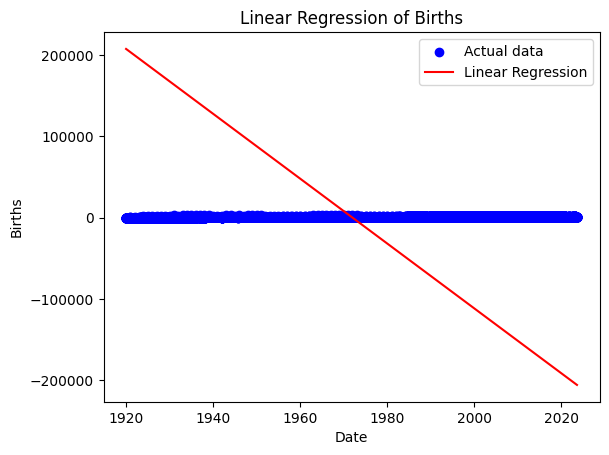

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('births.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime to numerical format (e.g., seconds since a reference date)
df['date_numeric'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Assume 'X' is the feature matrix (independent variable)
X = np.column_stack((np.ones_like(df['date_numeric']), df['date_numeric']))

# 'Y' is the target variable (dependent variable)
Y = df['births'].values

# Solve the linear regression using matrices
X_transpose = np.transpose(X)
X_transpose_X_inv = np.linalg.inv(np.dot(X_transpose, X))
theta = np.dot(np.dot(X_transpose_X_inv, X_transpose), Y)

# Predictions
predictions = np.dot(X, theta)

# Visualize the results
plt.scatter(df['date'], Y, label='Actual data', color='blue')
plt.plot(df['date'], predictions, label='Linear Regression', color='red')
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('Linear Regression of Births')
plt.legend()
plt.show()


Epoch 1/1000
946/946 [==============================] - 2s 2ms/step - loss: 1142433.3750
Epoch 2/1000
946/946 [==============================] - 2s 2ms/step - loss: 1139856.3750
Epoch 3/1000
946/946 [==============================] - 2s 2ms/step - loss: 1137282.7500
Epoch 4/1000
946/946 [==============================] - 1s 2ms/step - loss: 1134707.8750
Epoch 5/1000
946/946 [==============================] - 3s 3ms/step - loss: 1132137.0000
Epoch 6/1000
946/946 [==============================] - 5s 5ms/step - loss: 1129570.5000
Epoch 7/1000
946/946 [==============================] - 3s 3ms/step - loss: 1127010.8750
Epoch 8/1000
946/946 [==============================] - 3s 3ms/step - loss: 1124457.6250
Epoch 9/1000
946/946 [==============================] - 4s 4ms/step - loss: 1121906.3750
Epoch 10/1000
946/946 [==============================] - 6s 6ms/step - loss: 1119359.8750
Epoch 11/1000
946/946 [==============================] - 3s 3ms/step - loss: 1116812.6250
Epoch 12/1000
946/9

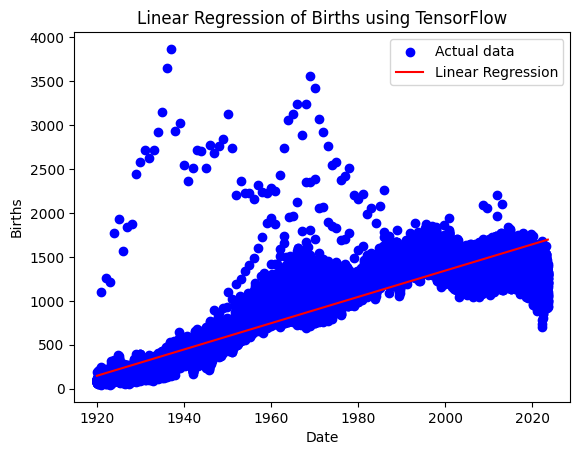

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('births.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime to numerical format (e.g., seconds since a reference date)
df['date_numeric'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Prepare the features and target variable
X = df['date_numeric'].values
Y = df['births'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

# Split the data into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
Y_train_tensor = tf.constant(Y_train, dtype=tf.float32)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train_tensor, Y_train_tensor, epochs=1000, callbacks=[early_stopping], verbose=1)

# Get the learned weights
weights = model.get_weights()
bias = weights[1][0]
slope = weights[0][0]

# Make predictions
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
predictions = model.predict(X_test_tensor)

# Visualize the results
plt.scatter(df['date'], Y, label='Actual data', color='blue')
plt.plot(df['date'], model.predict(X_scaled), label='Linear Regression', color='red')
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('Linear Regression of Births using TensorFlow')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('births.csv')

# Convert 'date' column to numerical representation (Unix timestamp)
df['date'] = pd.to_datetime(df['date']).astype(int) / 10**9  # Convert to Unix timestamp

# Assume 'X' is the feature matrix (independent variable)
X = df[['date']].values

# 'Y' is the target variable (dependent variable)
Y = df['births'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the linear regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {loss:.4f}')

# Get the learned weights (coefficients)
weights = model.get_weights()
coefficients = weights[0][0]
bias = weights[1][0]
# Print the coefficients
print("Coefficients (Weights):")
for i, coef in enumerate(coefficients):
    print(f'  Weight_{i+1}: {coef:.4f}')

print(f'Bias: {bias:.4f}')



Mean Squared Error on Test Set: 904999.8125
Coefficients (Weights):
  Weight_1: 89.3288
Bias: 94.1390


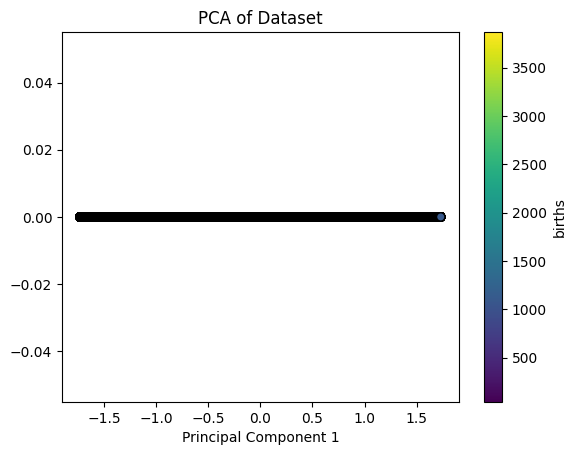

Mean Squared Error: 41263.047659440075


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def load_dataset(file_path):
    return pd.read_csv(file_path)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def compute_coefficients(X, y):
    X_augmented = np.column_stack((np.ones_like(X[:, 0]), X))
    coefficients = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y
    return coefficients

def preprocess_and_visualize_data(df, features, target):
    df['date_numeric'] = pd.to_datetime(df['date']).astype(int) / 10**9
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features].values)
    n_components = 1
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    plt.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), c=df[target].values, cmap='viridis', edgecolor='k')
    plt.title('PCA of Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('')
    plt.colorbar(label=target)
    plt.show()

    return pca, X_scaled

# Example usage:
file_path = 'births.csv'
df = load_dataset(file_path)

features = ['date_numeric']
target = 'births'

pca, X_scaled = preprocess_and_visualize_data(df, features, target)

# Assuming 'births' is the target variable, you might need to reshape it to a 2D array
y_true = df[target].values.reshape(-1, 1)

# Compute coefficients
coefficients = compute_coefficients(X_scaled, y_true)

# Augment the X_scaled matrix for predicting
X_pred = np.column_stack((np.ones_like(X_scaled[:, 0]), X_scaled))

# Predicted values
y_pred = X_pred @ coefficients

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

def load_dataset(file_path):
    return pd.read_csv(file_path)

def compute_coefficients(X, y, alpha=1.0):

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    coefficients = ridge_model.coef_

    return coefficients

# Load the dataset
file_path = 'births.csv'
df = load_dataset(file_path)

# Convert 'date' to a numeric format for simplicity
df['date_numeric'] = pd.to_datetime(df['date']).astype(int) / 10**9

# Separate features and target variable
X_raw = df[['date_numeric']].values
y_raw = df['births'].values.reshape(-1, 1)  # Reshape to a 2D array

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Augment the feature matrix
X_augmented = np.column_stack((np.ones_like(X_scaled[:, 0]), X_scaled))

# Specify regularization strength (alpha)
alpha = 1.0

# Compute coefficients using Ridge regression
coefficients = compute_coefficients(X_augmented, y_raw, alpha)

# Print the coefficients
print("Coefficients (weights):", coefficients)


Coefficients (weights): [[  0.         447.39928244]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load and Preprocess the Data
data = pd.read_csv("births.csv")

# Assuming "date" is in the first column, "state" in the second column, and "birth" in the third column
X = data[["date", "state"]]
y = data["births"]

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X = X.copy()

# Convert the "date" column to datetime format
X["date"] = pd.to_datetime(X["date"])

# Extract features from the date (e.g., day of the week, month, year)
X["day_of_week"] = X["date"].dt.dayofweek
X["month"] = X["date"].dt.month
X["year"] = X["date"].dt.year

# Drop the original "date" column
X = X.drop("date", axis=1)

# One-hot encode the "state" column
X = pd.get_dummies(X, columns=["state"], drop_first=True)

# Print unique values in the "state" column
print("Unique values in the 'state' column:", data["state"].unique())

# Print the number of samples
print("Number of samples:", len(X))

# Check if there are enough samples for splitting
if len(X) > 0:
    # Step 2: Data Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the number of samples in the training and testing sets
    print("Number of samples in the training set:", len(X_train))
    print("Number of samples in the testing set:", len(X_test))

    # Check if there are enough samples for training and testing
    if len(X_train) > 0 and len(X_test) > 0:
        # Step 3: Training
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Step 4: Prediction
        y_pred = model.predict(X_test)

        # Step 5: Evaluation (Optional)
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse}")
    else:
        print("Not enough samples for training/testing.")
else:
    print("Not enough samples for splitting.")


Unique values in the 'state' column: ['Malaysia']
Number of samples: 37833
Number of samples in the training set: 30266
Number of samples in the testing set: 7567
Mean Squared Error: 42094.39144030678


Unique values in the 'state' column: ['Malaysia']
Number of samples: 37833
Number of samples in the training set: 30266
Number of samples in the testing set: 7567
Mean Squared Error: 42094.39144030678


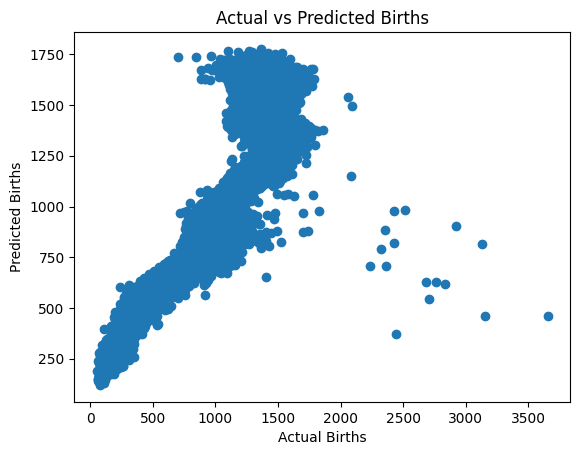

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Data
data = pd.read_csv("births.csv")

# Assuming "date" is in the first column, "state" in the second column, and "births" in the third column
X = data[["date", "state"]]
y = data["births"]

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X = X.copy()

# Convert the "date" column to datetime format
X["date"] = pd.to_datetime(X["date"])

# Extract features from the date (e.g., day of the week, month, year)
X["day_of_week"] = X["date"].dt.dayofweek
X["month"] = X["date"].dt.month
X["year"] = X["date"].dt.year

# Drop the original "date" column
X = X.drop("date", axis=1)

# One-hot encode the "state" column
X = pd.get_dummies(X, columns=["state"], drop_first=True)

# Print unique values in the "state" column
print("Unique values in the 'state' column:", data["state"].unique())

# Print the number of samples
print("Number of samples:", len(X))

# Check if there are enough samples for splitting
if len(X) > 0:
    # Step 2: Data Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the number of samples in the training and testing sets
    print("Number of samples in the training set:", len(X_train))
    print("Number of samples in the testing set:", len(X_test))

    # Check if there are enough samples for training and testing
    if len(X_train) > 0 and len(X_test) > 0:
        # Step 3: Training
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Step 4: Prediction
        y_pred = model.predict(X_test)

        # Step 5: Evaluation
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse}")

        # Step 6: Comparison (Plotting)
        plt.scatter(y_test, y_pred)
        plt.xlabel("Actual Births")
        plt.ylabel("Predicted Births")
        plt.title("Actual vs Predicted Births")
        plt.show()

    else:
        print("Not enough samples for training/testing.")
else:
    print("Not enough samples for splitting.")
